## Fraud_data

Q-se decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv("C:\\Users\\HP\\Downloads\\Fraud_check.csv")

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## EDA

In [4]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Undergrad  Marital.Status  Taxable.Income  City.Population  \
0        False           False           False            False   
1        False           False           False            False   
2        False           False           False            False   
3        False           False           False            False   
4        False           False           False            False   
..         ...             ...             ...              ...   
595      False           False           False            False   
596      False           False           False            False   
597      False           False           False            False   
598      False           False           False            False   
599      False           False           False            False   

     Work.Experience  Urban  
0              False  False  
1              False  False  
2              False  False  
3            

In [5]:
data.shape

(600, 6)

In [6]:
data.isnull().value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
False      False           False           False            False            False    600
dtype: int64

In [7]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# Model Building

In [9]:
df=data.copy()

In [10]:
from sklearn import tree

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X=df.drop(["Taxable.Income"],axis=1)

X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [13]:
y=data[["Taxable.Income"]]
y

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002
...,...
595,76340
596,69967
597,47334
598,98592


In [14]:
y["tax"]=["risky" if x<=30000 else "good" for x in y["Taxable.Income"]]

C:\Users\HP\AppData\Local\Temp\ipykernel_15400\3473571205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["tax"]=["risky" if x<=30000 else "good" for x in y["Taxable.Income"]]


In [15]:
y=y.drop(["Taxable.Income"],axis=1 )
y

,tax
0,good
1,good
2,good
3,good
4,good
...,...
595,good
596,good
597,good
598,good


In [16]:
label_encoder = preprocessing.LabelEncoder()


X["Undergrad"]= label_encoder.fit_transform(X['Undergrad']) 

In [17]:
X["Marital.Status"]= label_encoder.fit_transform(X['Marital.Status']) 

In [18]:
X["Urban"]= label_encoder.fit_transform(X['Urban']) 

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## model building using entropy criteria

In [20]:
from sklearn.tree import DecisionTreeClassifier


In [21]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

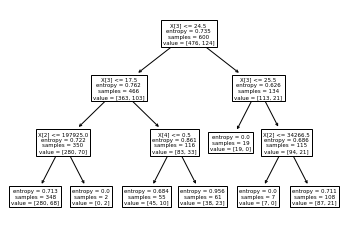

In [22]:
tree.plot_tree(model);

In [23]:
X.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [24]:
y.columns

Index(['tax'], dtype='object')

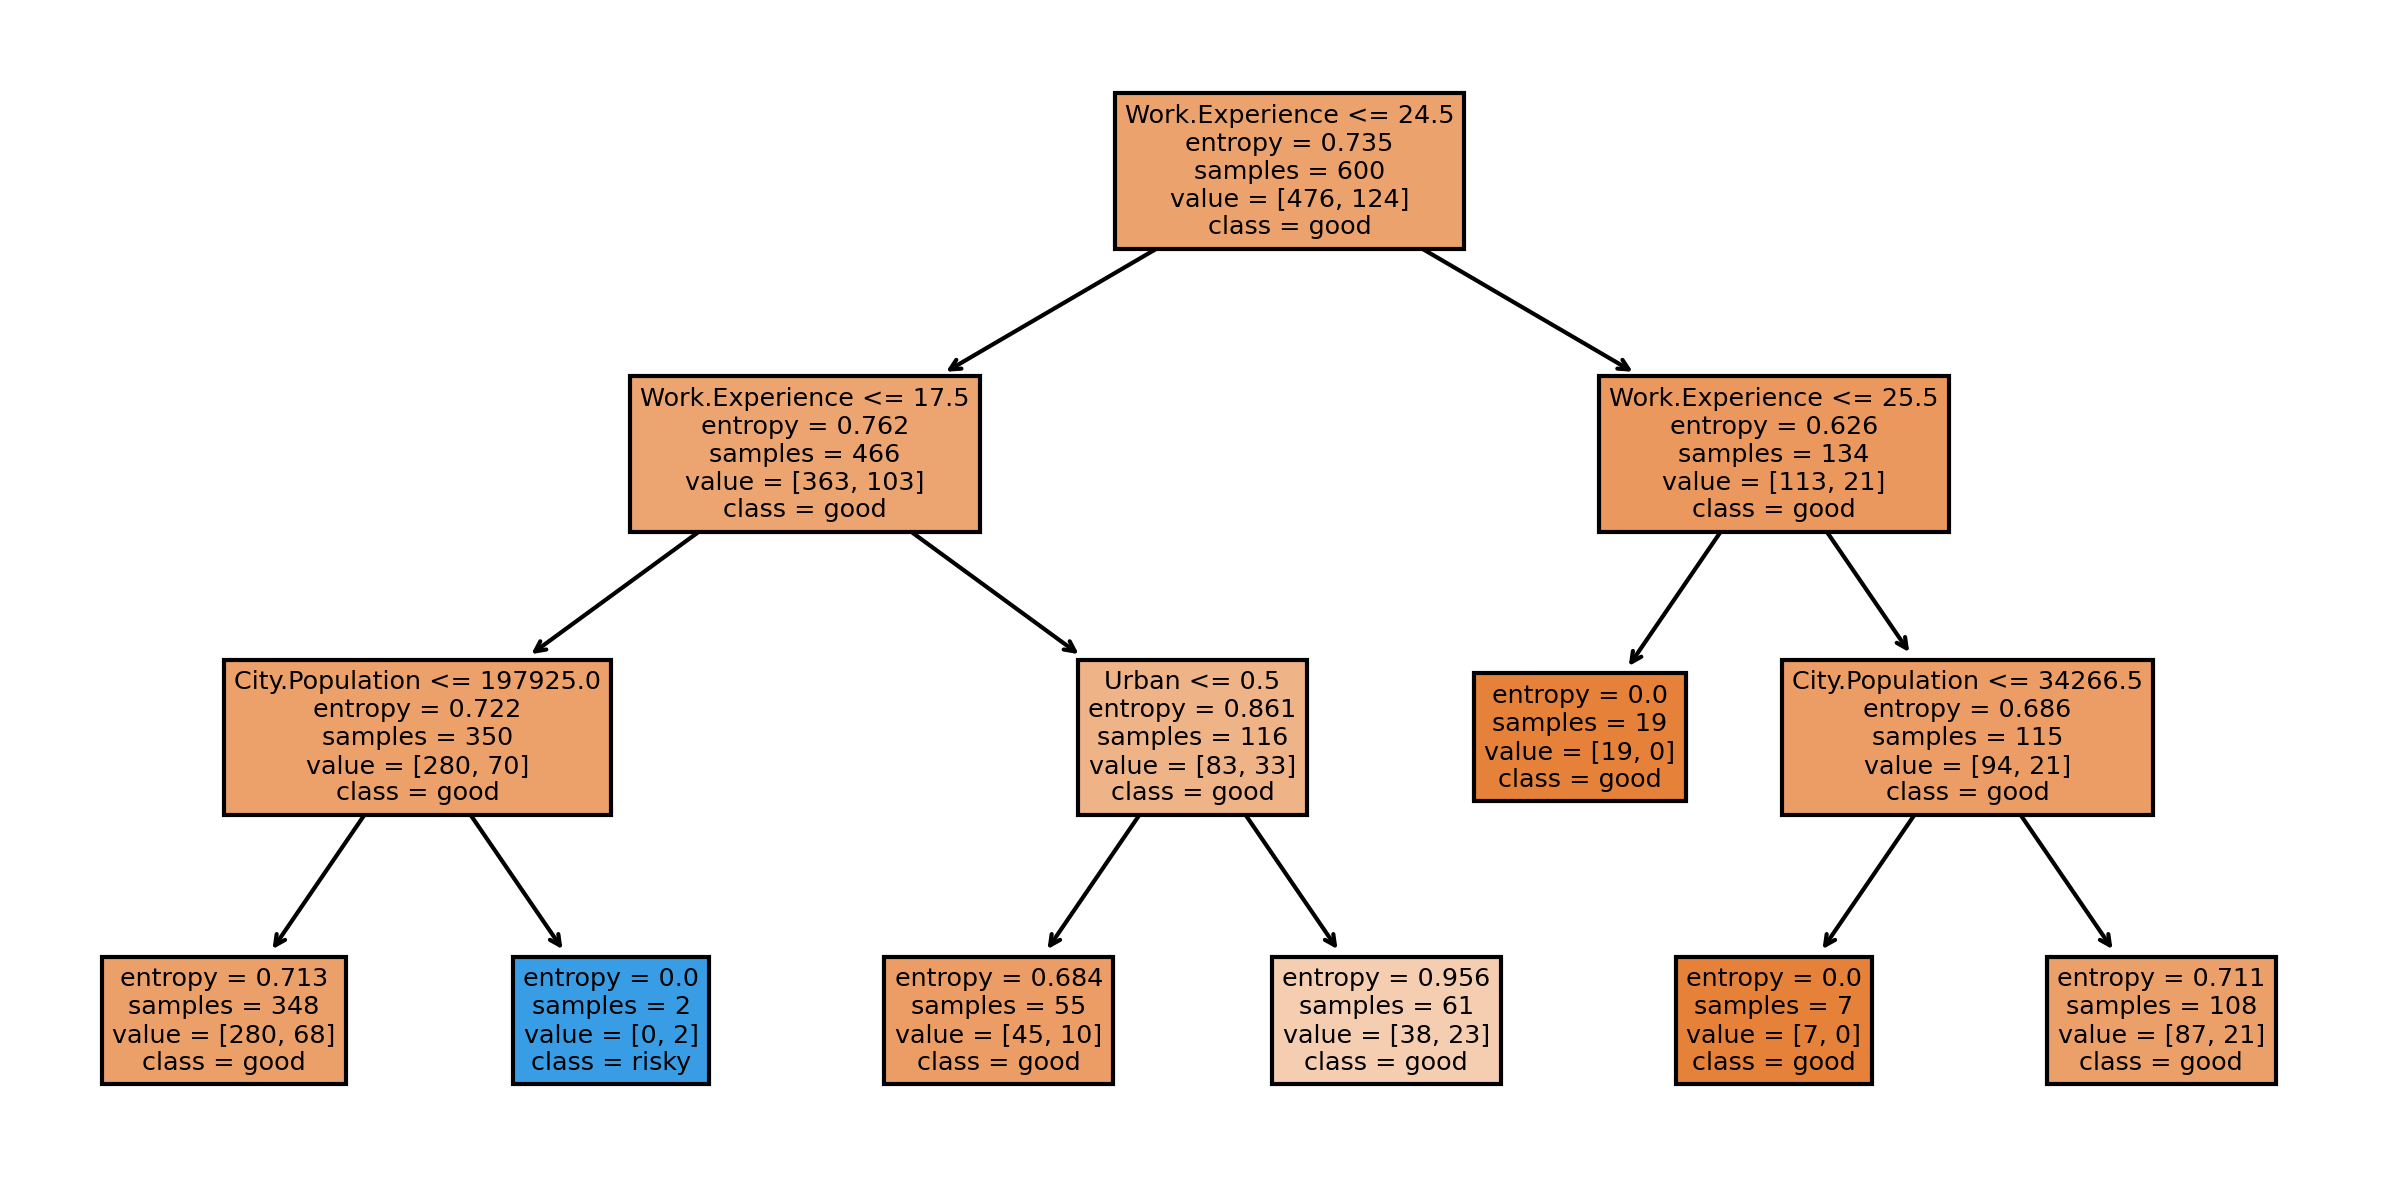

In [25]:
fn=["Undergrad", "Marital.Status","City.Population","Work.Experience","Urban"]
cn=["good","risky"]
fig,axes=plt.subplots(figsize=(10,5),dpi=300)
tree.plot_tree(model,feature_names=fn,
               class_names=cn,
               filled=True);



In [26]:
from sklearn.metrics import classification_report

In [27]:
pred=model.predict(X_test)


In [28]:
pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
     

In [29]:
model.score(X_test,y_test)

0.8

In [30]:
from sklearn.model_selection import GridSearchCV
Grid_Search=GridSearchCV(estimator=model,param_grid={"criterion":["entropy","gini"],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,20,25]},cv=5)

In [31]:
Grid_Search.fit(X,y)
print(Grid_Search.best_params_)
print(Grid_Search.best_score_)

{'criterion': 'entropy', 'max_depth': 1}
0.7933333333333332


In [32]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=1)
model.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [33]:
model.score(X_test,y_test)

0.7944444444444444

In [34]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=1)
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [35]:
model.score(X_test,y_test)

0.7944444444444444